An analysis aimed at understanding drivers behind our education platform customer behaviours. a use of dicision tree algorithm to extract information about the relationship between attribute (or features) of individual customers and our target output variable.

In [ ]:
# importing neccesary packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# loading the dataset
df = pd.read_csv('bank-full.csv', sep=";")

In [ ]:
# dimension of the dataframe(row,columns)
df.shape

(45211, 17)

#### Attribute Information
Input variables:
bank client data:
 - age (numeric)
 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
 - default: has credit in default? (categorical: 'no','yes','unknown')
 - housing: has housing loan? (categorical: 'no','yes','unknown')
 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
 - contact: contact communication type (categorical: 'cellular','telephone')
 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - cons.price.idx: consumer price index - monthly indicator (numeric)
 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# returns the first five rows by default
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Data analysis and visualization

In [ ]:
# You can use the following code to encode the output variable, y, with zeros and ones
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
# We are counting the number of customers in each group and dividing it by the total number of customers in the dataset. 
conversion_rate_df = pd.DataFrame(
df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)


In [ ]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [ ]:
#transposing for better presentation
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


### Conversion rates by job

In [ ]:
# Let's take a look at the conversion rates across different job categories. 
conversion_rate_by_job = df.groupby(by='job')['conversion'].sum() / df.groupby(by='job')['conversion'].count() * 100.0

In [ ]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

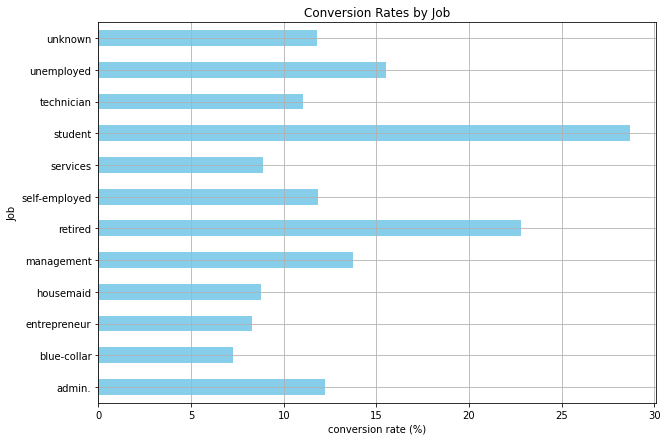

In [ ]:
# We can build a horizontal bar chart by using the following code
ax = conversion_rate_by_job.plot(
kind='barh',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Conversion Rates by Job'
)
ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')
plt.show()


### Default rates by conversions


In [ ]:
# We are going to use the pivot_table function in the pandas library to analyze the default rates by conversions.
default_by_conversion_df = pd.pivot_table(
df,
values='y',
index='default',
columns='conversion',
aggfunc=len
)


In [ ]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


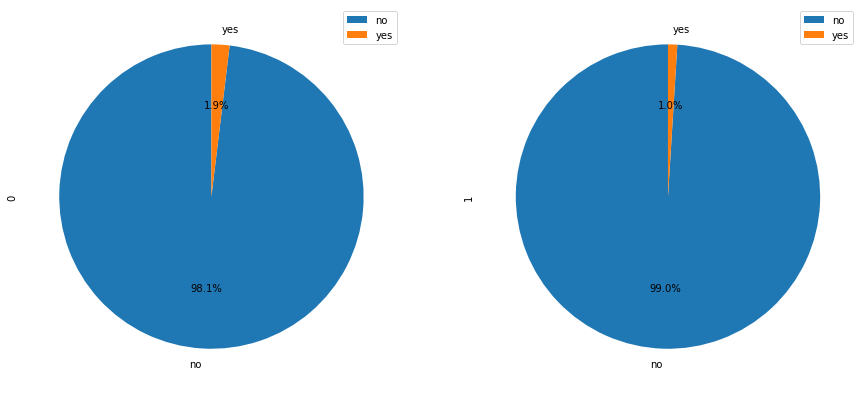

In [ ]:
# One way to visualize the data above is through a pie chart.
default_by_conversion_df.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()


### Bank balances by conversions


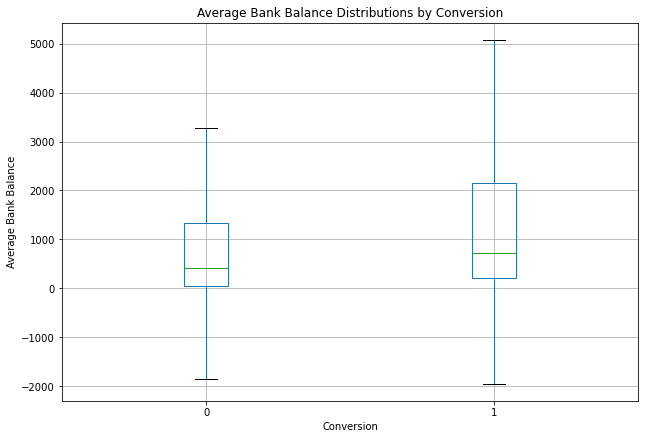

In [ ]:
#Next, we will try to see if there are any differences in the distributions of bank balances between the conversion and non-conversion groups
# using a box plot.
ax = df[['conversion', 'balance']].boxplot(
by='conversion',
showfliers=False,
figsize=(10, 7)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()


### Conversion rates by number of contacts

Lastly, we will look at how the conversion rates vary by the number of
contacts. Typically, in marketing, a higher number of marketing touches can
result in marketing fatigue, where the conversion rates drop as you reach out
to your customers more frequently. Let's see whether there is any marketing
fatigue in our data.

In [ ]:
conversions_by_num_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count() * 100.0

In [ ]:
df.groupby(by='campaign')['conversion'].sum()

campaign
1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
10      14
11      16
12       4
13       6
14       4
15       4
16       2
17       6
18       0
19       0
20       1
21       1
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       1
30       0
31       0
32       1
33       0
34       0
35       0
36       0
37       0
38       0
39       0
41       0
43       0
44       0
46       0
50       0
51       0
55       0
58       0
63       0
Name: conversion, dtype: int64

In [ ]:
df.groupby(by='campaign')['conversion'].count()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: conversion, dtype: int64

In [ ]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


It would be easier to look at a chart, rather than raw numbers. We
can plot this data by using bar charts.

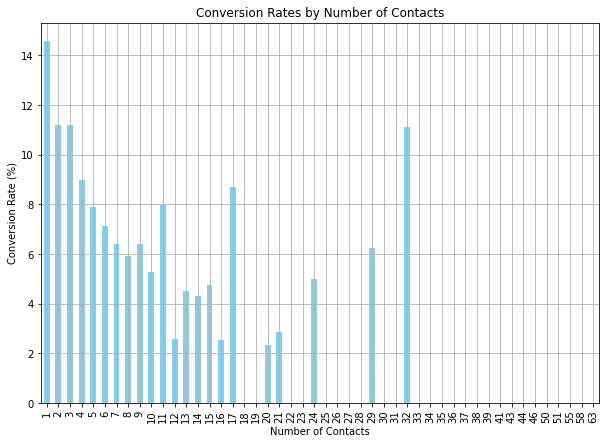

In [ ]:
ax = conversions_by_num_contacts.plot(
kind='bar',
figsize=(10, 7),
title='Conversion Rates by Number of Contacts',
grid=True,
color='skyblue'
)
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')
plt.show()


### Encoding categorical variables


There are eight categorical variables in this dataset: job, marital, education,
default, housing, loan, contact, and month. Before we start to build decision trees,
we need to encode these categorical variables with numerical values.

#### Encoding months


In [ ]:
# returns unique values under the 'month' variable
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
#  Since there is a natural ordering in the values of month, we can encode each of the values with a corresponding number
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct','nov', 'dec']

df['month'] = df['month'].apply(lambda x: months.index(x)+1)

In [ ]:
months.index('feb')

1

In [ ]:
df.month.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [ ]:
# number of converted records for each month
df.groupby('month')['conversion'].sum()

month
1     142
2     441
3     248
4     577
5     925
6     546
7     627
8     688
9     269
10    323
11    403
12    100
Name: conversion, dtype: int64

In [ ]:
# number of records for each month
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

### Encoding jobs

In [ ]:
# We will first look at the unique values in this column.
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
# We are going to create dummy variables for each of the job categories
# A dummy variable is a variable that is encoded with 1 if a given record belongs to thecategory, and 0 if not.
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [ ]:
jobs_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We need to append this data to the existing DataFrame.
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


### Encoding marital


In [ ]:
# we are going to create dummy variables for each category of the marital variable.
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [ ]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
# # We need to append this data to the existing DataFrame.

df=pd.concat([df, marital_encoded_df], axis=1)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,0,0,0,0,1,0,0,0,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,1,0,0,0,0,0,0,1,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1,0,0,0,0,0,0,0,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,0,0,0,0,0,0,0,0,1,0


### Encoding the housing and loan variables

In [ ]:
# The other variable, loan, also has two unique values, 'yes' and 'no', and tells us whether a customer has a personal loan
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

### Building decision trees

Now that we have encoded all of the categorical variables, we can finally
start to build decision tree models. We are going to use the following
variables as features in our decision tree models:



In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
#df.iloc[:,[0,5,6,12,14,18]]

In [ ]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [ ]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [ ]:
len(features)

20

In [ ]:
# Import the tree module in the sklearn package
from sklearn import tree

In [ ]:
# initializing the decision tree classifier
dt_model = tree.DecisionTreeClassifier(
max_depth=4
)

In [ ]:
# To train this decision tree model
dt_model.fit(df[features], df[response_var])


DecisionTreeClassifier(max_depth=4)

### Interpreting decision trees


In [ ]:
# conda install python-graphviz


In [ ]:
import graphviz

In [ ]:
dt_model.classes_


array([0, 1], dtype=int64)

In [ ]:

# dot_data = tree.export_graphviz(
# dt_model,
# feature_names=features,
# class_names=['0', '1'],
# filled=True,
# rounded=True,
# special_characters=True
# )
# graph = graphviz.Source(dot_data)

dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 
graph = graphviz.Source(dot_data)


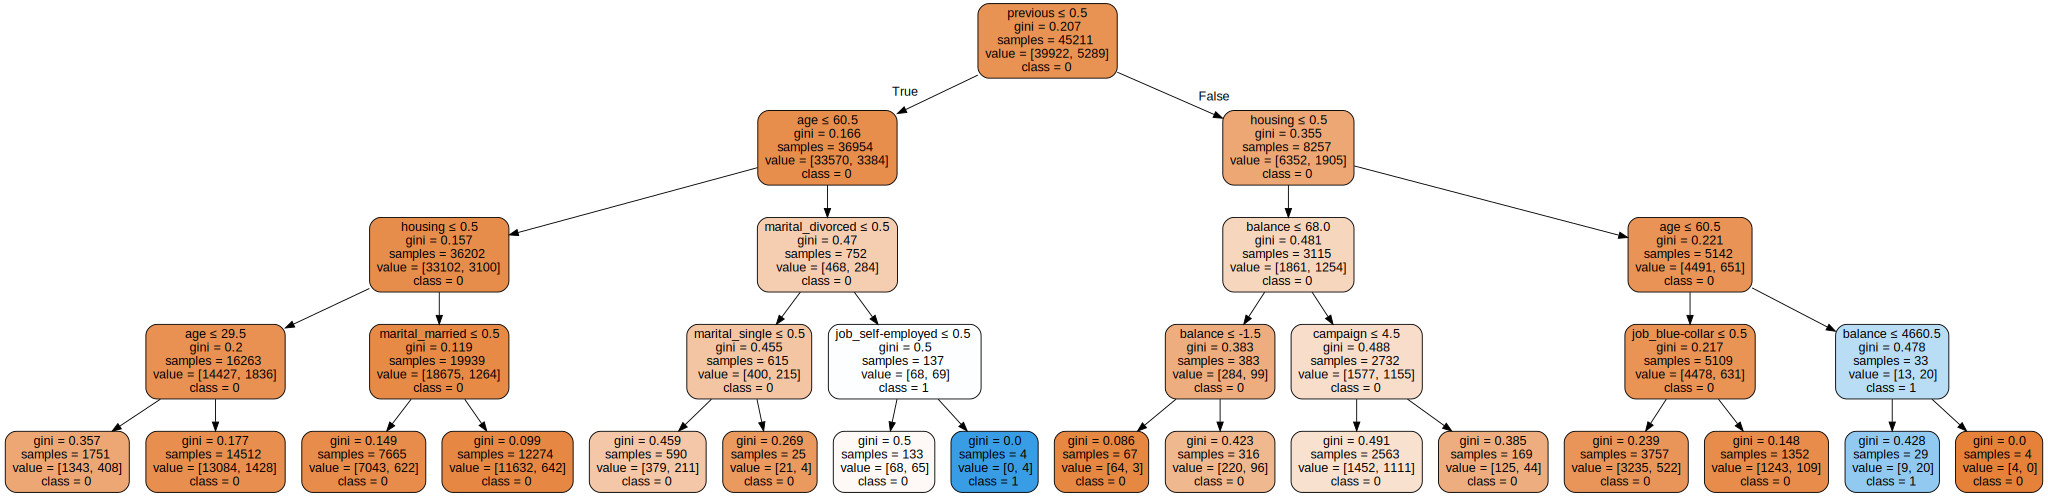

In [ ]:
graph


'font-size: 5px;'

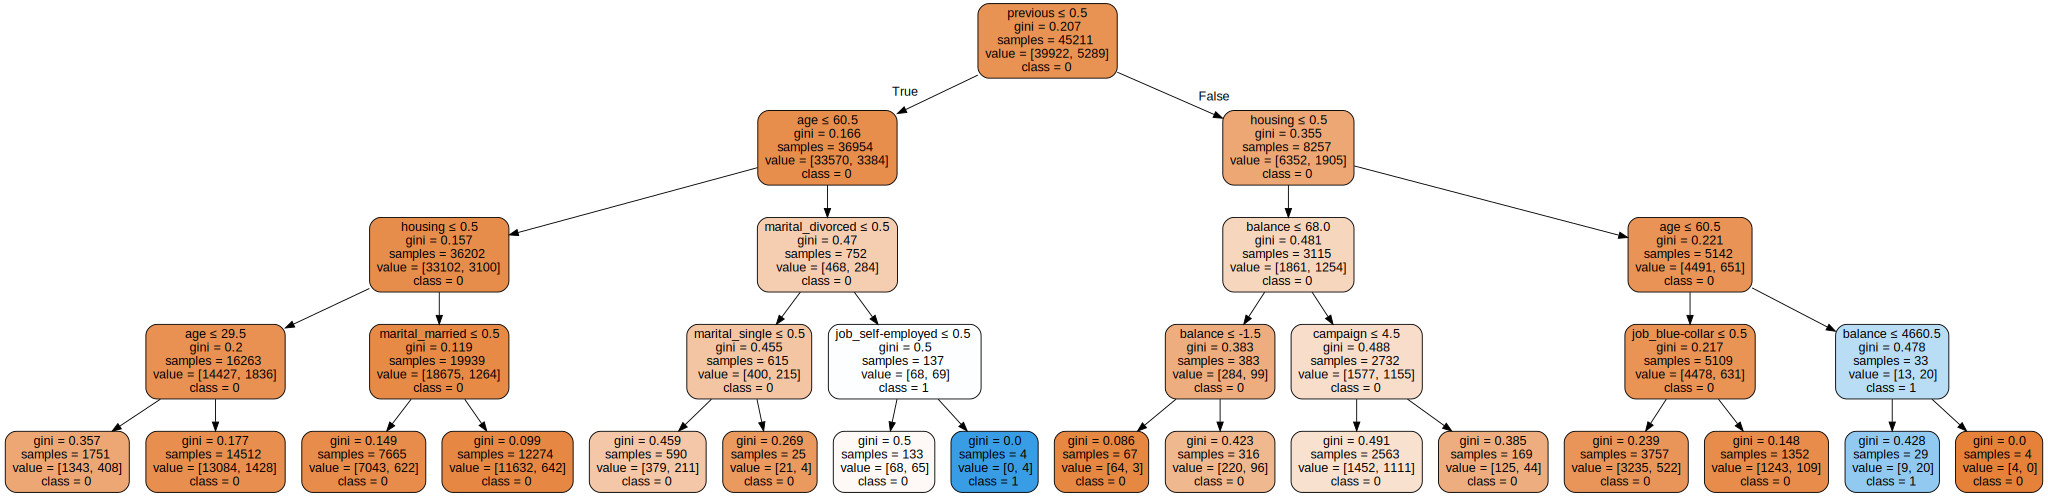

In [ ]:
from IPython.core.display import display, HTML
display("font-size: 5px;")

graph